In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

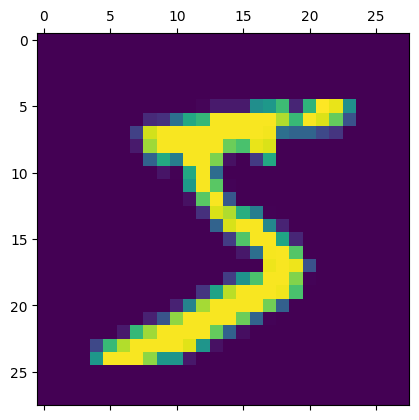

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4692 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2841 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9261


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.9264


[0.26551714539527893, 0.9264000058174133]

In [23]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


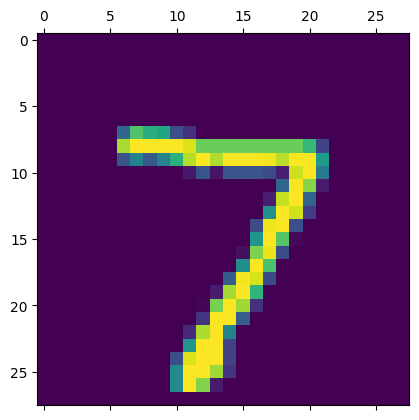

In [25]:
plt.matshow(X_test[0])

In [26]:
print(y_predicted[0])

[1.3183694e-02 4.2351439e-07 6.3489713e-02 9.4229764e-01 1.7863078e-03
 1.1557737e-01 1.7279061e-06 9.9977607e-01 9.6502341e-02 6.3796777e-01]


In [28]:
print(np.argmax(y_predicted[0]))

7


In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:5])

[7, 2, 1, 0, 4]


In [35]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
print(cm)

tf.Tensor(
[[ 956    0    3    2    0    4   10    2    3    0]
 [   0 1113    3    2    0    1    4    2   10    0]
 [   3    9  927   18    8    3   12   10   38    4]
 [   1    0   17  933    1   20    3   10   19    6]
 [   1    1    5    1  925    0    9    3   11   26]
 [   8    3    5   38   12  772   12    5   32    5]
 [   7    3    8    1    7   10  917    2    3    0]
 [   1    5   23    7    8    0    0  948    4   32]
 [   4    8    7   25    9   21    9   13  872    6]
 [   9    7    2   13   36    6    0   27    8  901]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

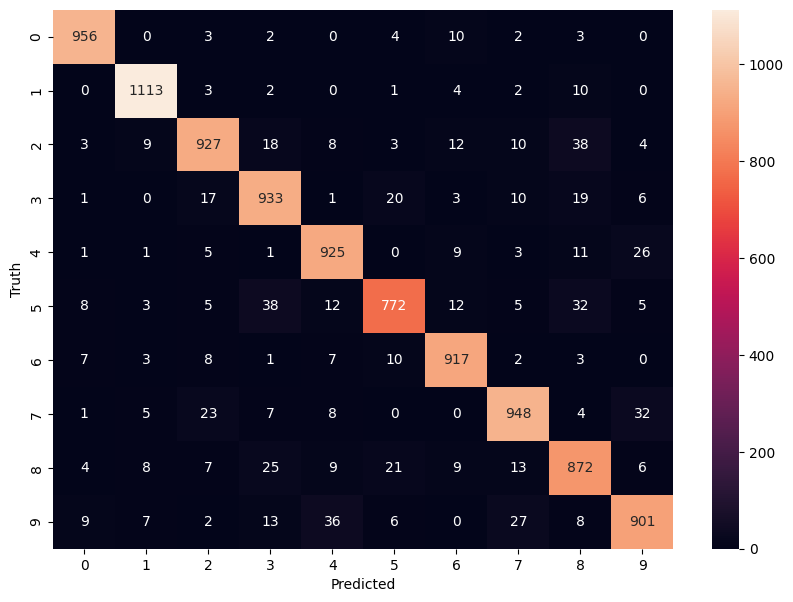

In [36]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
model = keras.Sequential([
      keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
      keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2666 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1215 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0635 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9841


In [43]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9774


[0.0854320079088211, 0.977400004863739]

In [47]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [48]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:5])

[7, 2, 1, 0, 4]


In [49]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
print(cm)

tf.Tensor(
[[ 969    1    2    0    1    2    2    1    1    1]
 [   0 1123    4    1    0    0    2    1    4    0]
 [   0    0 1019    0    1    0    2    7    3    0]
 [   0    0    6  982    0   11    0    3    3    5]
 [   1    0    3    1  963    0    3    4    1    6]
 [   2    0    0    4    2  878    2    0    3    1]
 [   5    2    1    1    4    6  937    2    0    0]
 [   0    3    6    2    0    1    0 1014    1    1]
 [   3    0    6    8    5    8    1    6  934    3]
 [   2    4    0    7   13   13    0   13    2  955]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

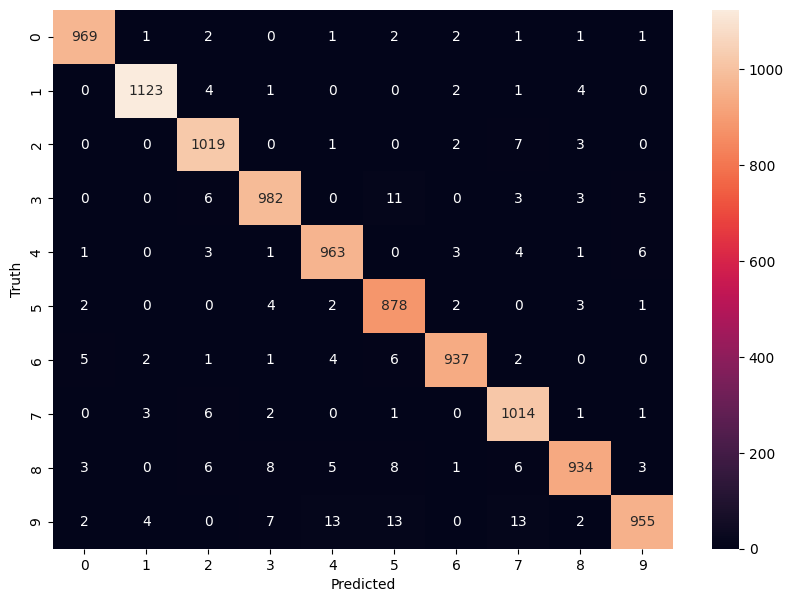

In [50]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')